FFT DATA:
 [ 0.22626199+0.j         -0.11026913-0.16222064j -0.0007803 +0.20938414j
 ...  0.10597375+0.06251448j -0.0007803 -0.20938414j
 -0.11026913+0.16222064j]
Amplitude:
 [0.22626199 0.19614998 0.20938559 ... 0.1230386  0.20938559 0.19614998]
Frequencies:
 [ 0.          0.29296875  0.5859375  ... -0.87890625 -0.5859375
 -0.29296875]


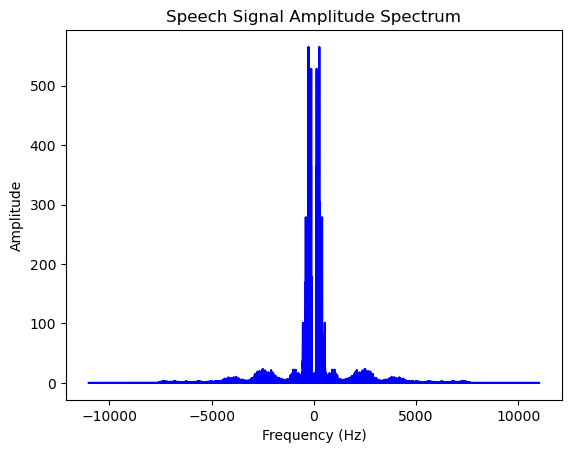

In [2]:
#A1
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

signal, sr = librosa.load("lab@omkar.wav")

fft_data = np.fft.fft(signal)
amplitude = np.abs(fft_data)

frequencies = np.fft.fftfreq(len(signal), d=1/sr)

print("FFT DATA:\n",fft_data)
print("Amplitude:\n",amplitude)
print("Frequencies:\n",frequencies)

plt.plot(frequencies, amplitude,color = "blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum")
plt.show()

C:\Users\yenug\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


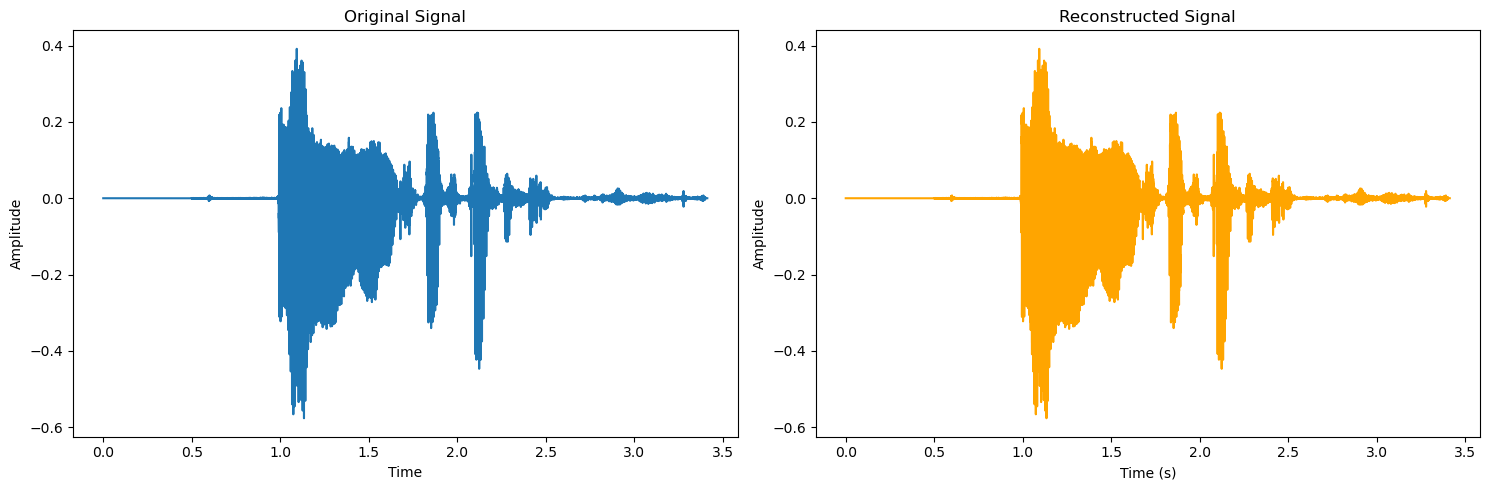

In [3]:
#A2
time_domain = np.fft.ifft(fft_data)
time_domain = time_domain[:len(signal)]
time = np.linspace(0, len(signal)/sr, len(signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time,signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain,color = "orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

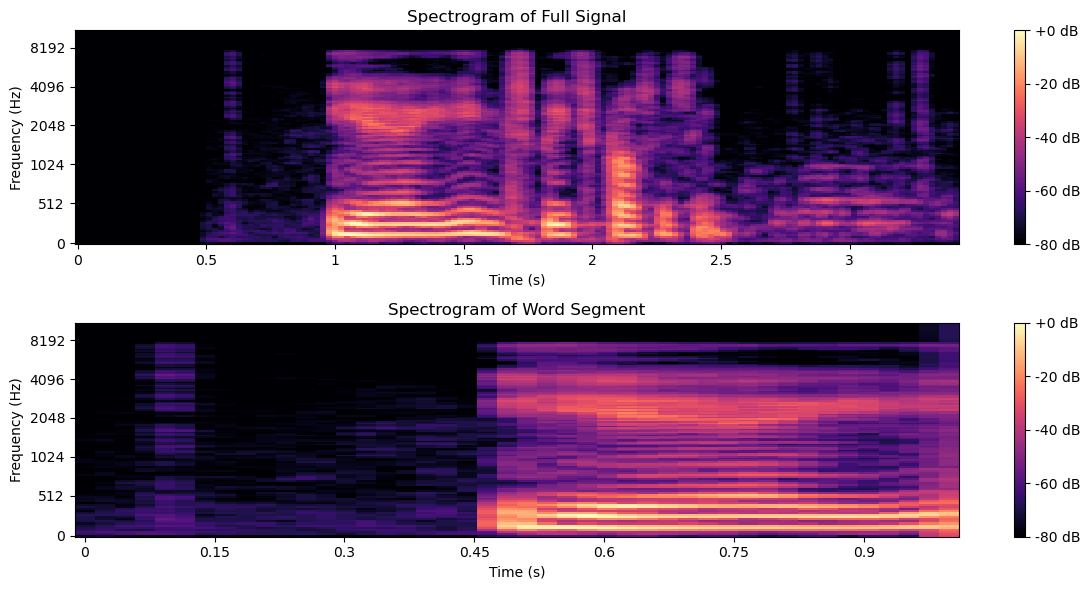

In [4]:
#A3
path = 'lab@omkar.wav'
full_signal, sr = librosa.load(path)

word_start_time = 0.5 
word_end_time = 1.5

start_sample = librosa.time_to_samples(word_start_time, sr=sr)
end_sample = librosa.time_to_samples(word_end_time, sr=sr)

word_segment = full_signal[start_sample:end_sample]

full_spec = librosa.feature.melspectrogram(y=full_signal, sr=sr)
word_spec = librosa.feature.melspectrogram(y=word_segment, sr=sr)

full_spec_db = librosa.power_to_db(full_spec, ref=np.max)
word_spec_db = librosa.power_to_db(word_spec, ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(full_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Full Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(word_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Word Segment')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


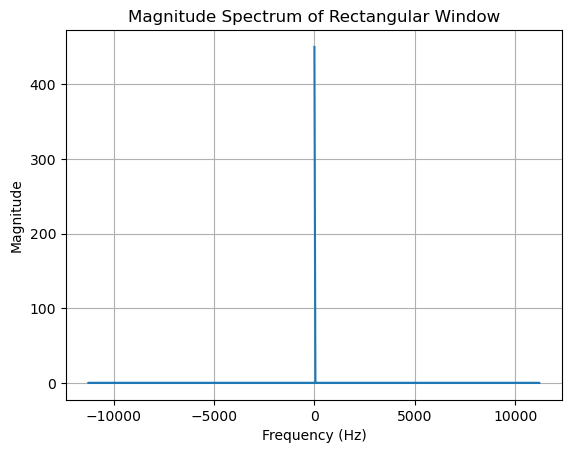

C:\Users\yenug\AppData\Local\Temp\ipykernel_13452\118577849.py:33: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
C:\Users\yenug\anaconda3\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'Varun.wav'

In [5]:
#A4
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
sampling_rate = 22500  # Sampling rate in Hz
window_duration = 0.02  # Window duration in seconds

# Generate the rectangular window
window_length = int(window_duration * sampling_rate)
rectangular_window = np.ones(window_length)

# Compute the FFT
fft_result = np.fft.fft(rectangular_window)

# Calculate the frequency axis
frequency_axis = np.fft.fftfreq(window_length, 1 / sampling_rate)

# Plot the magnitude spectrum
plt.plot(frequency_axis, np.abs(fft_result))
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

#Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this.
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

file_path = "lab@omkar.wav"
y, sr = librosa.load(file_path)

window_length = int(0.02 * sr)
hop_length = int(0.01 * sr)
D = librosa.stft(y, n_fft=window_length, hop_length=hop_length)
D_amplitude = np.abs(D)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D_amplitude, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()

C:\Users\yenug\AppData\Local\Temp\ipykernel_13452\1809903414.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')


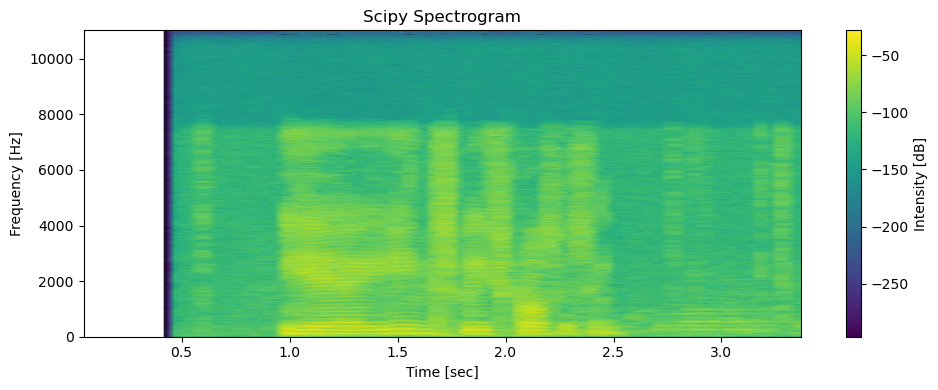

In [7]:
#A6
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa
import librosa.display

# Load the speech signal using librosa
file_path = "lab@omkar.wav"  # Change this to your file path
y, sr = librosa.load(file_path)

# Compute the spectrogram using scipy
frequencies, times, spec_scipy = spectrogram(y, fs=sr, nperseg=2048, noverlap=1536)

plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spec_scipy), shading='gouraud')
plt.title('Scipy Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()